In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data

# Load historical Canadian Dollar-Yen exchange rate futures data and apply time series analysis (cont'd)
# and modeling to determine whether there is any predictable behavior.

# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


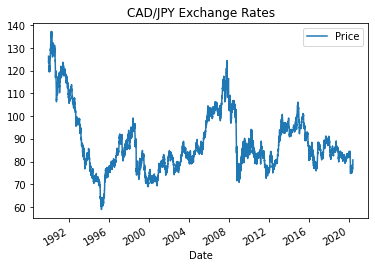

In [4]:
#  Initial Time-Series Plotting

# Plot just the "Price" column from the dataframe:

cad_jpy_df.Price.plot(title = 'CAD/JPY Exchange Rates').legend(loc='upper right')

In [5]:
# Question: Do you see any patterns, long-term and/or short?

# Answer:

In [6]:
# Decomposition Using a Hodrick-Prescott Filter
# Decompose the exchange rate price into trend and noise

import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:

noise, trend = sm.tsa.filters.hpfilter(cad_jpy_df['Price'])

In [7]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
noise.head()

Date
1990-01-02    0.519095
1990-01-03   -0.379684
1990-01-04   -2.048788
1990-01-05   -0.798304
1990-01-08   -0.897037
Name: Price_cycle, dtype: float64

In [8]:
cad_jpy_df = cad_jpy_df.drop(columns=['Open','High','Low'])
cad_jpy_df

,Price
Date,
1990-01-02,126.37
1990-01-03,125.30
1990-01-04,123.46
1990-01-05,124.54
1990-01-08,124.27
...,...
2020-05-29,78.29
2020-06-01,79.27
2020-06-02,80.40


In [11]:
add_columns = cad_jpy_df[["Price","noise","trend"]]
new_df = add_columns.copy()

KeyError: "['noise', 'trend'] not in index"